In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from importlib import import_module
from dataset import CustomDataLoader
from dataset import val_transform

import os 
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [4]:
# model

load_path = "/opt/ml/finalproject/multilabel/multi-head_celoss_fulltrain_best.pth"

N_CLASSES = 38
model_module = getattr(import_module("model"), "multihead")
model = model_module(num_classes=N_CLASSES, cls_classes = 6, device = device)
model.load_state_dict(torch.load(load_path))
# model = torch.load(load_path)
model.eval()

multihead(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

In [5]:
val_dataset = CustomDataLoader(
    image_dir="/opt/ml/finalproject/data/",
    data_dir="/opt/ml/finalproject/data/eval/eval.json",
    mode="eval", 
    transform=val_transform
)

loading annotations into memory...
Done (t=0.58s)
creating index...
index created!


In [7]:
category_names = [
    'Aerosol', 
    'Alcohol', 
    'Awl', 
    'Axe', 
    'Bat', 
    'Battery', 
    'Bullet', 
    'Firecracker', 
    'Gun', 
    'GunParts', 
    'Hammer',
    'HandCuffs', 
    'HDD', 
    'Knife', 
    'Laptop', 
    'Lighter', 
    'Liquid', 
    'Match', 
    'MetalPipe', 
    'NailClippers', 
    'PortableGas', 
    'Saw', 
    'Scissors', 
    'Screwdriver',
    'SmartPhone', 
    'SolidFuel', 
    'Spanner', 
    'SSD', 
    'SupplymentaryBattery', 
    'TabletPC', 
    'Thinner', 
    'USB', 
    'ZippoOil', 
    'Plier', 
    'Chisel', 
    'Electronic cigarettes',
    'Electronic cigarettes(Liquid)', 
    'Throwing Knife'
]

['Saw'] ['Saw']
/opt/ml/finalproject/data/eval/Astrophysics/Saw/Single_Other/H_8202.39-2090_10_717.png


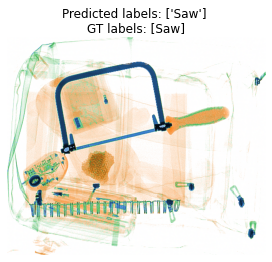

In [90]:
# Run inference on the test data
model.eval()

root_dir = "/opt/ml/finalproject/data/eval/"
li = [i+1 for i in range(100)]
for sample_id in [15426]:#,2,3,4,6]:
    test_img, test_labels, file_path = val_dataset[sample_id]
    with torch.no_grad():
        img = test_img[None,:] #.to(device)
        outs, cls_outs = model(img)
        raw_pred = torch.argmax(outs[0], dim=1)
    label_num = np.argwhere(raw_pred == 1)[0]
    predicted_labels = np.array(category_names)[label_num]
    if type(predicted_labels) != np.ndarray:
        predicted_labels = [predicted_labels]
    else:
        predicted_labels = list(predicted_labels)
    img_labels = np.array(category_names)[np.argwhere(test_labels.astype(int)==1)].T[0]
    print(predicted_labels, img_labels)
    image = test_img.numpy()
    plt.imshow(Image.open(os.path.join(root_dir,file_path[1:])))
    plt.title("Predicted labels: {} \nGT labels: [{}]".format(predicted_labels, ', '.join(img_labels)))
    plt.axis('off')
    print(os.path.join(root_dir,file_path[1:]))